<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#План-работы-над-проектом" data-toc-modified-id="План-работы-над-проектом-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>План работы над проектом</a></span></li></ul></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод-по-шагу-1:" data-toc-modified-id="Вывод-по-шагу-1:-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод по шагу 1:</a></span></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Вывод-:" data-toc-modified-id="Вывод-:-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод :</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Итоговый-вывод" data-toc-modified-id="Итоговый-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Итоговый вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

### План работы над проектом

1. Изучить данные. Разбить данные на тренировочную, валидационную и тестовую выборку.
2. Исследовать задачу. Проверить модели на данных без учета баланса классов
3. Скоректировать балланс классов.
4. Выбрать оптимальный метод решения проблемы балансов классов , определить оптимальные гиперпараметры
5. Провести финальный тест.
6. Написать вывод и оформить проект.

## Подготовка данных

In [1]:
!pip install scikit-learn==1.1.3

     |████████████████████████████████| 30.8 MB 45 kB/s  eta 0:00:011B/s eta 0:00:02
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.1
    Uninstalling scikit-learn-0.24.1:
      Successfully uninstalled scikit-learn-0.24.1


In [2]:
import pandas as pd
import warnings
import numpy as np
warnings.simplefilter('ignore')
from scipy import stats as st
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg' 
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5
from sklearn.utils import shuffle
from sklearn.model_selection import (
    GridSearchCV, 
    RandomizedSearchCV,
    train_test_split
)
from sklearn.metrics import (
    
    confusion_matrix, 
    f1_score,
    roc_auc_score,
    roc_curve,
    precision_recall_curve
)
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression



from sklearn.compose import make_column_transformer




from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import (
    OneHotEncoder,
    OrdinalEncoder,
    StandardScaler
)
from sklearn.dummy import DummyClassifier

In [3]:
try :
    data = pd.read_csv('/datasets/Churn.csv')
    display(data.head(10))
except:
    data  = pd.read_csv('Churn (1).csv')
    display(data.head(10))


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


In [4]:
#функция для получения общей информации о датафрейме
def df_inf(data): 
    display(data.head())
    display(data.describe(include='all').T)
    display(data.info())
    for column in data.columns:
        display()
        display(column)
        display(data[column].unique())
    display(data[data.duplicated()])
    display(pd.DataFrame(round(data.isna().mean()*100,1)).style.background_gradient('coolwarm') )

In [5]:
df_inf(data)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,NaN,NaN,NaN,5000.5,2886.89568,1.0,2500.75,5000.5,7500.25,10000.0
CustomerId,10000.0,NaN,NaN,NaN,15690940.5694,71936.186123,15565701.0,15628528.25,15690738.0,15753233.75,15815690.0
Surname,10000,2932,Smith,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CreditScore,10000.0,NaN,NaN,NaN,650.5288,96.653299,350.0,584.0,652.0,718.0,850.0
Geography,10000,3,France,5014,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,10000,2,Male,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,10000.0,NaN,NaN,NaN,38.9218,10.487806,18.0,32.0,37.0,44.0,92.0
Tenure,9091.0,NaN,NaN,NaN,4.99769,2.894723,0.0,2.0,5.0,7.0,10.0
Balance,10000.0,NaN,NaN,NaN,76485.889288,62397.405202,0.0,0.0,97198.54,127644.24,250898.09
NumOfProducts,10000.0,NaN,NaN,NaN,1.5302,0.581654,1.0,1.0,1.0,2.0,4.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


None

'RowNumber'

array([    1,     2,     3, ...,  9998,  9999, 10000])

'CustomerId'

array([15634602, 15647311, 15619304, ..., 15584532, 15682355, 15628319])

'Surname'

array(['Hargrave', 'Hill', 'Onio', ..., 'Kashiwagi', 'Aldridge',
       'Burbidge'], dtype=object)

'CreditScore'

array([619, 608, 502, 699, 850, 645, 822, 376, 501, 684, 528, 497, 476,
       549, 635, 616, 653, 587, 726, 732, 636, 510, 669, 846, 577, 756,
       571, 574, 411, 591, 533, 553, 520, 722, 475, 490, 804, 582, 472,
       465, 556, 834, 660, 776, 829, 637, 550, 698, 585, 788, 655, 601,
       656, 725, 511, 614, 742, 687, 555, 603, 751, 581, 735, 661, 675,
       738, 813, 657, 604, 519, 664, 678, 757, 416, 665, 777, 543, 506,
       493, 652, 750, 729, 646, 647, 808, 524, 769, 730, 515, 773, 814,
       710, 413, 623, 670, 622, 785, 605, 479, 685, 538, 562, 721, 628,
       668, 828, 674, 625, 432, 770, 758, 795, 686, 789, 589, 461, 584,
       579, 663, 682, 793, 691, 485, 650, 754, 535, 716, 539, 706, 586,
       631, 717, 800, 683, 704, 615, 667, 484, 480, 578, 512, 606, 597,
       778, 514, 525, 715, 580, 807, 521, 759, 516, 711, 618, 643, 671,
       689, 620, 676, 572, 695, 592, 567, 694, 547, 594, 673, 610, 767,
       763, 712, 703, 662, 659, 523, 772, 545, 634, 739, 771, 68

'Geography'

array(['France', 'Spain', 'Germany'], dtype=object)

'Gender'

array(['Female', 'Male'], dtype=object)

'Age'

array([42, 41, 39, 43, 44, 50, 29, 27, 31, 24, 34, 25, 35, 45, 58, 32, 38,
       46, 36, 33, 40, 51, 61, 49, 37, 19, 66, 56, 26, 21, 55, 75, 22, 30,
       28, 65, 48, 52, 57, 73, 47, 54, 72, 20, 67, 79, 62, 53, 80, 59, 68,
       23, 60, 70, 63, 64, 18, 82, 69, 74, 71, 76, 77, 88, 85, 84, 78, 81,
       92, 83])

'Tenure'

array([ 2.,  1.,  8.,  7.,  4.,  6.,  3., 10.,  5.,  9.,  0., nan])

'Balance'

array([     0.  ,  83807.86, 159660.8 , ...,  57369.61,  75075.31,
       130142.79])

'NumOfProducts'

array([1, 3, 2, 4])

'HasCrCard'

array([1, 0])

'IsActiveMember'

array([1, 0])

'EstimatedSalary'

array([101348.88, 112542.58, 113931.57, ...,  42085.58,  92888.52,
        38190.78])

'Exited'

array([1, 0])

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


,0
RowNumber,0.000000
CustomerId,0.000000
Surname,0.000000
CreditScore,0.000000
Geography,0.000000
Gender,0.000000
Age,0.000000
Tenure,9.100000
Balance,0.000000
NumOfProducts,0.000000


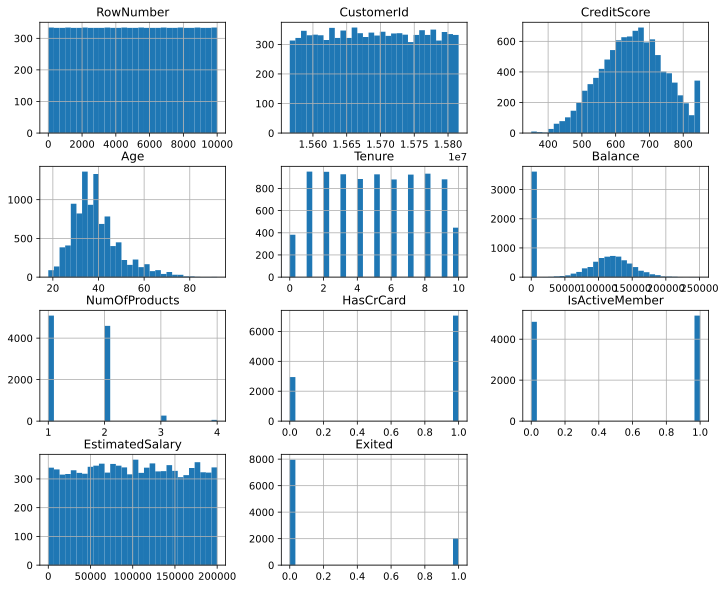

In [6]:
data.hist(figsize=(12,10),bins=30);

При проверке данных обнаружены пропуски в Tenure,заполним медианой,  так как пропуски выглядят случайными, и восстановить значения не представляется возможным а удалять строки с пропущенными значениями нежелательно так как их слишком много и можно потерять ценную информацию

In [7]:
data.Tenure=data.Tenure.fillna(int(data.Tenure.median()))

In [8]:
data.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
data.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure             float64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

Видим что часть данных необходимо привести из категориального типа в числовой для корректной работы классификатора

In [10]:
data.shape

(10000, 14)

In [11]:
#data_one = pd.get_dummies(data, drop_first=True)
#data_one.head(5)

data_one=pd.get_dummies(data, drop_first=True,columns=['Geography','Gender'])
data_one.head(5)

In [12]:
features = data.drop(['Exited','Surname','RowNumber','CustomerId'] , axis=1)
target = data['Exited']


Удалим столбцы  'Surname','RowNumber','CustomerId' так как они  не несут полезной информации  так как уйдет клиент из банка не зависит от фамилии и id,  а номер строки повторяет RowNumber

In [13]:
features_train, features_valid, target_train, target_valid = train_test_split(
features, target, test_size=0.4, random_state=12345)
features_valid,features_test,target_valid, target_test=train_test_split(features_valid,target_valid,test_size=0.50,random_state=12345)
print('Размер тренерующей выборки', features_train.shape[0])
print('Размер валидационной выборки', features_valid.shape[0])
print('Размер тестовой выборки', features_test.shape[0])

Размер тренерующей выборки 6000
Размер валидационной выборки 2000
Размер тестовой выборки 2000


Разделили выборку на тестовую ,валидационную и тренировочную

In [14]:
#категориальные признаки для OHE Ridge
ohe_features_ridge = features_train.select_dtypes(include='object').columns.to_list()
print(ohe_features_ridge)

#категориальные признаки для OHE RandomForestRegressor
ohe_features_rf = ohe_features_ridge.copy()

['Geography', 'Gender']


In [15]:
#численные признаки
#обратите внимание, что 'repaired' — категориальный бинарный признак.
num_features = features_train.select_dtypes(exclude='object').columns.to_list()
num_features.remove('HasCrCard')
num_features.remove('IsActiveMember')

num_features

['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

In [16]:
X_train_ridge = features_train.copy()
X_valid_ridge=features_valid.copy()
X_test_ridge = features_test.copy()
X_train_ridge.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
7479,567,Spain,Male,35,8.0,153137.74,1,1,0,88659.07
3411,711,France,Female,37,8.0,113899.92,1,0,0,80215.20
6027,850,Germany,Male,44,3.0,140393.65,2,0,1,186285.52
1247,512,France,Male,24,6.0,0.00,2,1,0,37654.31
3716,665,Germany,Female,27,2.0,147435.96,1,0,0,187508.06


In [17]:
# drop='first' удаляет первый признак из закодированных:
# таким образом обходим dummy-ловушку
# задаём handle_unknown='ignore':
# игнорируется ранее невстречающиеся значения признака (при transform)
encoder_ohe = OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False)

# обучаем энкодер на заданных категориальных признаках тренировочной выборки
encoder_ohe.fit(X_train_ridge[ohe_features_ridge])

# добавляем закодированные признаки в X_train_ohe
# encoder_ohe.get_feature_names_out() позволяет получить названия колонок
X_train_ridge[
    encoder_ohe.get_feature_names_out()
] = encoder_ohe.transform(X_train_ridge[ohe_features_ridge])

# удаляем незакодированные категориальные признаки (изначальные колонки)
X_train_ridge = X_train_ridge.drop(ohe_features_ridge, axis=1)

# создаём скелер
scaler = StandardScaler()

# обучаем его на численных признаках тренировочной выборки, трансформируем её же
X_train_ridge[num_features] = scaler.fit_transform(X_train_ridge[num_features])

# смотрим на результат
X_train_ridge.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
7479,-0.886751,-0.373192,1.082277,1.232271,-0.891560,1,0,-0.187705,0.0,1.0,1.0
3411,0.608663,-0.183385,1.082277,0.600563,-0.891560,0,0,-0.333945,0.0,0.0,0.0
6027,2.052152,0.480939,-0.737696,1.027098,0.830152,0,1,1.503095,1.0,0.0,1.0
1247,-1.457915,-1.417129,0.354288,-1.233163,0.830152,1,0,-1.071061,0.0,0.0,1.0
3716,0.130961,-1.132419,-1.101690,1.140475,-0.891560,0,0,1.524268,1.0,0.0,0.0


In [18]:
# энкодером, который обучен на ТРЕНИРОВОЧНОЙ ВЫБОРКЕ, кодируем валидационную
X_valid_ridge[
    encoder_ohe.get_feature_names_out()
] = encoder_ohe.transform(X_valid_ridge[ohe_features_ridge])

X_valid_ridge = X_valid_ridge.drop(ohe_features_ridge, axis=1)

# скелером, который обучен на ТРЕНИРОВОЧНОЙ ВЫБОРКЕ, масштабируем тестовую
X_valid_ridge[num_features] = scaler.transform(
    X_valid_ridge[num_features]
)

# смотрим на результат
X_valid_ridge.head()


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
8532,-0.699824,-0.373192,-1.101690,-1.233163,0.830152,1,0,-0.015173,0.0,0.0,0.0
5799,-0.284431,0.575842,-0.737696,-1.233163,-0.891560,1,1,1.471724,0.0,0.0,0.0
5511,0.151731,-0.657902,-1.829679,0.438711,-0.891560,1,0,-1.367107,1.0,0.0,1.0
7365,-0.876366,-0.278288,1.810266,1.239884,-0.891560,1,1,-0.786517,0.0,1.0,0.0
7367,-0.481743,0.291132,1.810266,-1.233163,0.830152,1,0,1.358533,0.0,1.0,1.0


In [19]:
# энкодером, который обучен на ТРЕНИРОВОЧНОЙ ВЫБОРКЕ, кодируем тестовую
X_test_ridge[
    encoder_ohe.get_feature_names_out()
] = encoder_ohe.transform(X_test_ridge[ohe_features_ridge])

X_test_ridge = X_test_ridge.drop(ohe_features_ridge, axis=1)

# скелером, который обучен на ТРЕНИРОВОЧНОЙ ВЫБОРКЕ, масштабируем тестовую
X_test_ridge[num_features] = scaler.transform(
    X_test_ridge[num_features]
)

# смотрим на результат
X_test_ridge.head()


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
7041,-2.226392,-0.088482,-1.101690,-1.233163,0.830152,1,0,0.647083,0.0,0.0,1.0
5709,-0.087120,0.006422,1.446272,-1.233163,-0.891560,1,0,-1.658410,0.0,0.0,0.0
7117,-0.917905,-0.752805,-0.009707,0.722307,-0.891560,1,1,-1.369334,0.0,1.0,1.0
7775,-0.253277,0.101325,1.810266,-1.233163,0.830152,1,0,0.075086,0.0,1.0,1.0
8735,0.785204,-0.847708,1.810266,0.615625,-0.891560,0,1,-1.070919,0.0,0.0,1.0


In [20]:
X_train_ridge.shape, X_test_ridge.shape

((6000, 11), (2000, 11))

<div class="alert alert-warning">
<h2> Комментарий ревьюера  #2 <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 

Признак «repaired» у нас будет в одном из последующих проектов :)
       
</div>

In [21]:
display(data.Tenure.count())

10000


### Вывод по шагу 1:
Была загружена и изучена инфорация, найдены и заполнены пропуски , найдены и удалены признаки не несущие ценности  .Категориальные признаки были преобразованы в числовые с учетом проклятия размерности. Также выборка была разделена на тестовую валидационную и тренировочную.

## Исследование задачи

In [22]:
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(X_train_ridge, target_train)
predicted_valid=model.predict(X_valid_ridge)
print(f1_score(target_valid, predicted_valid))

0.33108108108108103


f1 мера модели крайне низкая, скорее всего проблема в низком качестве точности или полноты 

In [23]:
for depth in range(1, 16):
    model = DecisionTreeClassifier(random_state=12345,max_depth=depth)
    model.fit(X_train_ridge, target_train)
    predicted_valid = model.predict(X_valid_ridge)


    print('depth',depth, f1_score(target_valid, predicted_valid))

depth 1 0.0
depth 2 0.5217391304347825
depth 3 0.4234875444839857
depth 4 0.5528700906344411
depth 5 0.5406249999999999
depth 6 0.5696969696969697
depth 7 0.5320813771517998
depth 8 0.5454545454545454
depth 9 0.5633802816901409
depth 10 0.5385694249649369
depth 11 0.5059920106524634
depth 12 0.521072796934866
depth 13 0.5038961038961038
depth 14 0.48675914249684743
depth 15 0.4975124378109453


Наиболее оптимальные параметры depth 9 тогда качество модели 0.5633802816901409

In [24]:
%%time
best_model = None
f1 = 0
for est in range(10, 151, 10):
    for depth in range(1, 16):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model.fit(X_train_ridge, target_train) # обучите модель на тренировочной выборке
        m=model.predict(X_valid_ridge)
        if  f1<f1_score(target_valid, m):
            f1 = f1_score(target_valid, m)
            print('est',est,'depth',depth,'f1',f1)
           

est 10 depth 2 f1 0.2
est 10 depth 3 f1 0.25102880658436216
est 10 depth 4 f1 0.49578414839797635
est 10 depth 5 f1 0.5170731707317073
est 10 depth 6 f1 0.5475409836065573
est 10 depth 7 f1 0.5625965996908809
est 10 depth 9 f1 0.5809379727685325
est 10 depth 10 f1 0.5891238670694864
est 90 depth 12 f1 0.5896656534954408
CPU times: user 1min 41s, sys: 417 ms, total: 1min 41s
Wall time: 1min 43s


 Наилучшие результаты достигаются при est 10 depth 10 тогда f1 достигает 0.5891238670694864

auc_rocLogisticRegression 0.7587512627102753
auc_rocDecisionTree 0.7801515554775917
auc_rocRandomForest 0.8456038023457679


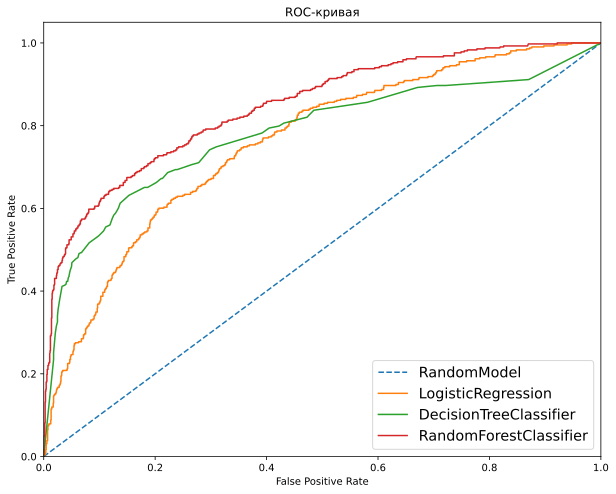

In [25]:
plt.figure(figsize=(10, 8))
plt.plot([0, 1], [0, 1], linestyle='--', label='RandomModel')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])



model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(X_train_ridge, target_train)
probabilities_valid = model.predict_proba(X_valid_ridge)
probabilities_one=probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one)
auc_roc =roc_auc_score(target_valid, probabilities_valid[:, 1])

print('auc_rocLogisticRegression',auc_roc)

plt.plot(fpr, tpr, label='LogisticRegression') 

model = DecisionTreeClassifier(random_state=12345, max_depth=9)
model.fit(X_train_ridge, target_train)
probabilities_valid = model.predict_proba(X_valid_ridge)
probabilities_one=probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one)
auc_roc =roc_auc_score(target_valid, probabilities_valid[:, 1])

plt.plot(fpr, tpr, label='DecisionTreeClassifier') 
print('auc_rocDecisionTree',auc_roc)

model = RandomForestClassifier(random_state=12345, n_estimators=10,max_depth=10)
model.fit(X_train_ridge, target_train)
probabilities_valid = model.predict_proba(X_valid_ridge)
probabilities_one=probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one)
auc_roc =roc_auc_score(target_valid, probabilities_valid[:, 1])

print('auc_rocRandomForest',auc_roc)

plt.plot(fpr, tpr, label='RandomForestClassifier') 
plt.legend(loc='lower right', fontsize='x-large')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC-кривая')
plt.show()


Вывод по шагу 2.

Были построены модели и оптимизированы гиперпараметры. Также были оценены auc_roc, f1 мера.
Видим что качество модели случайного леса наибольшая по оценке auc_roc, на втором месте является дерево решений которое незначительно отстает по качеству.
Однако все модели по f1  мере не проходят требуемый порог даже после настройки гиперпараметров. Оссобенно плохо справляется логистическая регрессия.


## Борьба с дисбалансом

С дисбалансом будем бороться с помощью техник увеличения образцов минимального класса, уменьшения обрацов максимального класса и увеличением веса минимального класса

In [26]:
target.value_counts(normalize=True)

0    0.7963
1    0.2037
Name: Exited, dtype: float64

Посмотрели дисбаланс классов.
Сначала составим функцию повышающую количество образцов минимального класса.

In [27]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    features_upsampled, target_upsampled = shuffle(
    features_upsampled, target_upsampled, random_state=12345)
    return features_upsampled, target_upsampled

проверим на наших моделях насколько изменится f1 мера после изменений

!pip install imblearn
from imblearn.over_sampling import SMOTE
oversample = SMOTE(random_state=12345)
features_train_up, target_train_up = oversample.fit_resample(X_train_ridge, target_train)

features_upsampled, target_upsampled=features_train_up, target_train_up

попробовал технику , но на данной задачке почему то точность моделей меньше чем если через функцию делаю . оставил выше в маркдаун

In [28]:
features_upsampled, target_upsampled = upsample(X_train_ridge, target_train, 4)


model=LogisticRegression(solver='liblinear',random_state=12345)
model.fit(features_upsampled,target_upsampled)
predicted_valid=model.predict(X_valid_ridge)
print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.4888507718696398


In [29]:
for depth in range(1, 16):
    model = DecisionTreeClassifier(random_state=12345,max_depth=depth)
    model.fit(features_upsampled,target_upsampled)
    predicted_valid = model.predict(X_valid_ridge)


    print('depth',depth, f1_score(target_valid, predicted_valid))

depth 1 0.4994903160040775
depth 2 0.541015625
depth 3 0.541015625
depth 4 0.5277777777777778
depth 5 0.5963791267305644
depth 6 0.5581835383159887
depth 7 0.5524752475247525
depth 8 0.5408560311284047
depth 9 0.5405940594059405
depth 10 0.5159420289855072
depth 11 0.5351521511017839
depth 12 0.5117227319062181
depth 13 0.5119825708061002
depth 14 0.4994375703037121
depth 15 0.486796785304248


Получили наилучший результат модели на depth 5 с мерой ф1 0.5963791267305644

In [30]:
%%time
best_model = None
f1 = 0
for est in range(10, 151, 10):
    for depth in range(1, 16):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model.fit(features_upsampled,target_upsampled) # обучите модель на тренировочной выборке
        m=model.predict(X_valid_ridge)
        if  f1<f1_score(target_valid, m):
            f1 = f1_score(target_valid, m)
            print('est',est,'depth',depth,'f1',f1)
           

est 10 depth 1 f1 0.5159165751920967
est 10 depth 2 f1 0.5766129032258065
est 10 depth 3 f1 0.5792972459639126
est 10 depth 4 f1 0.6064257028112451
est 10 depth 8 f1 0.6125
est 10 depth 13 f1 0.6146682188591385
est 20 depth 8 f1 0.62217659137577
est 20 depth 14 f1 0.6274509803921569
est 60 depth 11 f1 0.629086809470124
est 70 depth 9 f1 0.6291179596174282
CPU times: user 2min 16s, sys: 464 ms, total: 2min 17s
Wall time: 2min 18s


получили наилучший результат модели при глубине дерева  9 и числе оценщиков 70  0.6291179596174282

все три оценщика показали возросшую эффективность после применения метода.
Попробуем уменьшить количество образцов лидирующего класса 

In [31]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(X_train_ridge, target_train, 0.25)




In [32]:
model=LogisticRegression(random_state=12345,solver='liblinear')
model.fit(features_downsampled, target_downsampled)
predicted_valid=model.predict(X_valid_ridge)
print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.48406546080964685


In [33]:
for depth in range(1, 16):
    model = DecisionTreeClassifier(random_state=12345,max_depth=depth)
    model.fit(features_downsampled, target_downsampled)
    predicted_valid = model.predict(X_valid_ridge)


    print('depth',depth, f1_score(target_valid, predicted_valid))

depth 1 0.5061845861084681
depth 2 0.5394495412844036
depth 3 0.5555555555555556
depth 4 0.5357737104825291
depth 5 0.5943204868154158
depth 6 0.5749525616698292
depth 7 0.5304659498207885
depth 8 0.5181159420289856
depth 9 0.522911051212938
depth 10 0.5135895032802249
depth 11 0.5117117117117117
depth 12 0.4881474978050922
depth 13 0.49107901444350044
depth 14 0.4982698961937717
depth 15 0.4987277353689567


лучший результат depth 5 0.5943204868154158

In [34]:
%%time
best_model = None
f1 = 0
for est in range(10, 151, 10):
    for depth in range(1, 16):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model.fit(features_downsampled, target_downsampled) # обучите модель на тренировочной выборке
        m=model.predict(X_valid_ridge)
        if  f1<f1_score(target_valid, m):
            f1 = f1_score(target_valid, m)
            print('est',est,'depth',depth,'f1',f1)
           

est 10 depth 1 f1 0.49902912621359224
est 10 depth 2 f1 0.5504407443682664
est 10 depth 3 f1 0.5696316262353999
est 10 depth 4 f1 0.6092184368737475
CPU times: user 1min, sys: 395 ms, total: 1min 1s
Wall time: 1min 1s


результаты возросли но не в той же мере как у предыдущей техники.Попробуем использовать технику балансового веса весов

In [35]:
model = LogisticRegression(random_state=12345, solver='liblinear',class_weight="balanced")
model.fit(X_train_ridge, target_train)
predicted_valid=model.predict(X_valid_ridge)
print(f1_score(target_valid, predicted_valid))

0.4888507718696398


In [36]:
for depth in range(1, 16):
    model = DecisionTreeClassifier(random_state=12345,max_depth=depth,class_weight="balanced")
    model.fit(X_train_ridge, target_train)
    predicted_valid = model.predict(X_valid_ridge)


    print('depth',depth, f1_score(target_valid, predicted_valid))

depth 1 0.4994903160040775
depth 2 0.541015625
depth 3 0.541015625
depth 4 0.5277777777777778
depth 5 0.5963791267305644
depth 6 0.5581835383159887
depth 7 0.5508390918065154
depth 8 0.5398058252427185
depth 9 0.5431119920713577
depth 10 0.5081495685522531
depth 11 0.533748701973001
depth 12 0.5035677879714576
depth 13 0.5151515151515152
depth 14 0.4872080088987764
depth 15 0.47861271676300576


лучший результат depth 5 0.5963791267305644

In [37]:
%%time
best_model = None
f1 = 0
for est in range(10, 151, 10):
    for depth in range(1, 16):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth,class_weight="balanced")
        model.fit(X_train_ridge, target_train) # обучите модель на тренировочной выборке
        m=model.predict(X_valid_ridge)
        if  f1<f1_score(target_valid, m):
            f1 = f1_score(target_valid, m)
            print('est',est,'depth',depth,'f1',f1)

est 10 depth 1 f1 0.5159165751920967
est 10 depth 2 f1 0.569620253164557
est 10 depth 4 f1 0.5989637305699482
est 10 depth 6 f1 0.6071428571428573
est 10 depth 7 f1 0.6078838174273858
est 10 depth 8 f1 0.6225596529284164
est 40 depth 8 f1 0.6270270270270271
est 60 depth 7 f1 0.6271186440677966
est 90 depth 9 f1 0.6284403669724771
est 110 depth 9 f1 0.6291618828932262
CPU times: user 1min 45s, sys: 1.07 s, total: 1min 46s
Wall time: 1min 48s


лучший результат при est 110 depth 9 f1 0.6291618828932262

auc_rocLogisticRegression 0.7637310291013133
auc_rocDecisionTree 0.8310244134068074
auc_rocRandomForest 0.8544813360835717


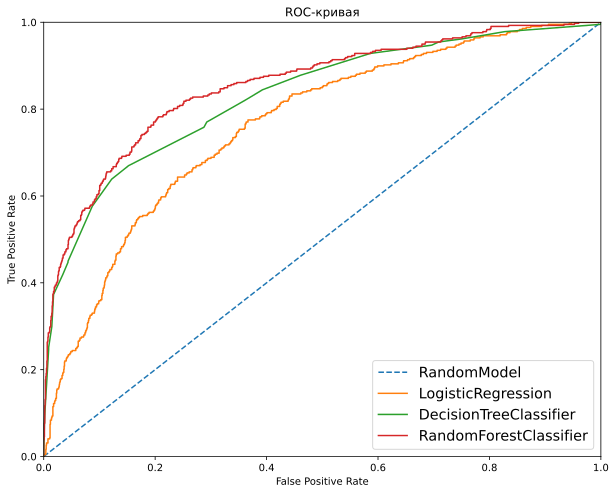

In [38]:
plt.figure(figsize=(10, 8))
plt.plot([0, 1], [0, 1], linestyle='--', label='RandomModel')
plt.ylim([0.0, 1])
plt.xlim([0.0, 1.0])



model = LogisticRegression(random_state=12345, solver='liblinear',class_weight="balanced")
model.fit(X_train_ridge, target_train)
probabilities_valid = model.predict_proba(X_valid_ridge)
probabilities_one=probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one)
auc_roc =roc_auc_score(target_valid, probabilities_valid[:, 1])

print('auc_rocLogisticRegression',auc_roc)

plt.plot(fpr, tpr, label='LogisticRegression') 

model = DecisionTreeClassifier(random_state=12345, max_depth=5,class_weight="balanced")
model.fit(X_train_ridge, target_train)
probabilities_valid = model.predict_proba(X_valid_ridge)
probabilities_one=probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one)
auc_roc =roc_auc_score(target_valid, probabilities_valid[:, 1])

plt.plot(fpr, tpr, label='DecisionTreeClassifier') 
print('auc_rocDecisionTree',auc_roc)

model = RandomForestClassifier(random_state=12345, n_estimators=110,max_depth=9,class_weight="balanced")
model.fit(X_train_ridge, target_train)
probabilities_valid = model.predict_proba(X_valid_ridge)
probabilities_one=probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one)
auc_roc =roc_auc_score(target_valid, probabilities_valid[:, 1])

print('auc_rocRandomForest',auc_roc)

plt.plot(fpr, tpr, label='RandomForestClassifier') 
plt.legend(loc='lower right', fontsize='x-large')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC-кривая')
plt.show()


### Вывод :
В ходе борьбы с дисбалансом были опробованы 3 метода- увеличения числа обьектов наименьшего класса , уменьшение числа обьектов наибольшего класса и изменение веса обьектов . Все методы повышают эффективность модели, и практически одинаково эффективны.
Наиболее эффективной моделью оказался случайный лес . Он преодолел необходимый порог во всех трех моделях

## Тестирование модели

In [39]:

model_RandomForest = RandomForestClassifier(random_state=12345, n_estimators=80,max_depth=10,class_weight="balanced")
model_RandomForest.fit(X_train_ridge, target_train)
predictions_test_RandomForest = model_RandomForest.predict(X_test_ridge) # получите предсказания модели на валидационной выборке
print('f1_score',f1_score(target_test, predictions_test_RandomForest ))



f1_score 0.6097271648873073


In [40]:
dummy_model = DummyClassifier(strategy='constant', constant=1)
dummy_model.fit(features_train, target_train)
f1_score(dummy_model.predict(X_test_ridge), target_test)

0.3491539413949649

Вывод : наиболее удачная модель была протестирована , и набрала необходимый порог f меры .  При проверке на адекватность видим что если бы модель просто предсказывала 1 то f1 мера была бы гораздо ниже

## Итоговый вывод

При работе с проектом было выполнено:

1. Изучены данные. Разбиты данные на тренировочную, валидационную и тестовую выборку.
2. Исследована задача. Проверены модели на данных без изменений.
3. Скоректированы баланс класса, посредством взвешивания классов
4. Получена улученная модель. Проведен поиск гиперпараметров.
5. Проведен финальный тест.

Обученная модель случайного леса со взвешенными классами имеет достаточную адекватность, подтвержденная ее значением AUC-ROC = 0.845. Мера f1 достигла 60,97 на тестовых данных. Модель старается собрать больше данных, чем показать верную точность (recall > precision). Процент попадания в классы достаточно высокий.

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: задача исследована
    - [x]  Исследован баланс классов
    - [x]  Изучены модели без учёта дисбаланса
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 3: учтён дисбаланс
    - [x]  Применено несколько способов борьбы с дисбалансом
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 4: проведено тестирование
- [x]  Удалось достичь *F1*-меры не менее 0.59
- [x]  Исследована метрика *AUC-ROC*